# 第6章 大样本OLS

## 6.4 蒙特卡洛模拟中心极限定理

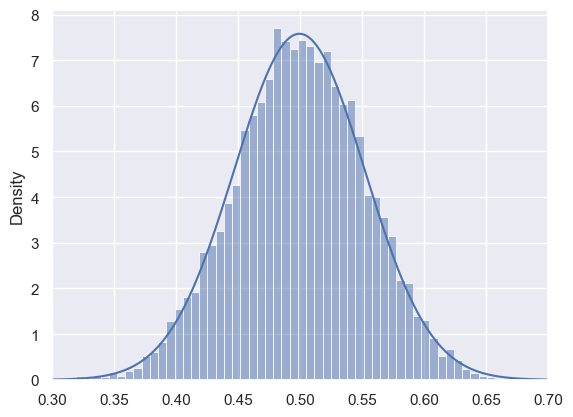

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from cmath import sqrt

np.random.seed(0)

# 生成10000个从均匀分布中抽样30次的样本均值
x_mean = np.array([])

def generate_x_i(obs):
    x_i = np.random.uniform(0, 1, obs)
    return x_i.mean()

for i in range(10000):
    x_mean = np.append(x_mean,generate_x_i(30))

# 生成正态分布N(0.5，sqrt(1/360))的样本
samples = norm.rvs(loc=0.5, scale=sqrt(1/360), size=10000)
# 计算样本的均值和标准差
sample_mean = np.mean(samples)
sample_std = np.std(samples)
x = np.linspace(0.3, 0.7, 1000)
y = norm.pdf(x, sample_mean, sample_std)

# 绘制概率密度函数
sns.set_theme(color_codes=True)
sns.histplot(x_mean,kde=False,stat='density',alpha=0.5)
plt.xlim(0.3,0.7)
plt.plot(x, y)
plt.show()

## 6.10 大样本OLS和python命令及实例

In [2]:

import pandas as pd
import statsmodels.api as sm
import seaborn as sns

nerlove = pd.read_stata('../2_Data/Data-2e/nerlove.dta')
nerlove.head(), nerlove.describe()

(      tc  q   pl         pf   pk      lntc       lnq      lnpf      lnpk  \
 0  0.082  2  2.1  17.900000  183 -2.501036  0.693147  2.884801  5.209486   
 1  0.661  3  2.1  35.099998  174 -0.414001  1.098612  3.558201  5.159055   
 2  0.990  4  2.1  35.099998  171 -0.010050  1.386294  3.558201  5.141664   
 3  0.315  4  1.8  32.200001  166 -1.155183  1.386294  3.471967  5.111988   
 4  0.197  5  2.1  28.600000  233 -1.624552  1.609438  3.353407  5.451038   
 
        lnpl  
 0  0.741937  
 1  0.741937  
 2  0.741937  
 3  0.587787  
 4  0.741937  ,
                tc             q          pl          pf          pk  \
 count  145.000000    145.000000  145.000000  145.000000  145.000000   
 mean    12.976095   2133.082759    1.976552   26.176552  174.496552   
 std     19.794577   2931.942131    0.230040    7.876071   18.209477   
 min      0.082000      2.000000    1.500000   10.300000  138.000000   
 25%      2.382000    279.000000    1.800000   21.299999  162.000000   
 50%      6.7

In [13]:
# 先使用普通标准误差计算回归方程

X = nerlove[['lnq','lnpl','lnpk','lnpf']]
y = nerlove['lntc']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   lntc   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.9
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           4.67e-78
Time:                        18:17:06   Log-Likelihood:                -67.509
No. Observations:                 145   AIC:                             145.0
Df Residuals:                     140   BIC:                             159.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5665      1.779     -2.004      0.0

In [17]:
# 然后使用HC0方法计算回归方程的标准误差。
# 使用get_robustcov_results方法计算稳健标准误
robust_results = results.get_robustcov_results(cov_type='HC0')

# HC0使用的是white(1980)的方法，与教材中使用的稳健标准误计算公式一致。
print(robust_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   lntc   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     177.2
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           9.75e-54
Time:                        18:29:42   Log-Likelihood:                -67.509
No. Observations:                 145   AIC:                             145.0
Df Residuals:                     140   BIC:                             159.9
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5665      1.718     -2.076      0.0